# Eksploratorna analiza podataka (Exploratory Data Analysis - EDA)

### Cilj

U ovoj bilježnici pokušat ćemo što preciznije odrediti je li neka transakcija prevara ili nije. Prepoznavanje kartičnih prevara je važno jer se u današnjem vremenu sve više transakcija odvija elektroničkim putem (zbog pandemije je sada i preporučeno) pa je potrebno da banke i slične institucije što bolje čuvaju korisnikove resurse te pronalaze transakcije koje su prevare.

### Podaci

Skup podataka preuzet je sa Kagglea. U tom skupu podataka je navedeno da su svi podaci prikupljeni u Europi tijekom rujna 2013-te godine. Svi podaci su prikupljeni tokom 2 dana te je napomenuto da se sastoji od preko 280 000 transakcija od kojih je samo 492 prevare. Također je napomenuto da je nad svim značajkama osim 'Amount' i 'Time' primjenjena <i>PCA</i> (Principal Component Analysis, hrv. metoda osnovnih komponenata) transformacija. Tih 28 značajki je također preimenovano u 'V1, ..., V28' zbog sigurnosnih razloga. Značajka 'Time' obilježava vrijeme koje je proteklo od prve do neke određene transakcije (u sekundama), dok značajka 'Amount' obilježava kolika je vrijednost transakcije. Imamo i posebnu značajku 'Class' čija je jedina svrha da označi je li transakcija valjana ili je prevara.

### Hardver, softver i ostali paketi

Hardver: 
<ul>
    <li>Procesor: Intel Core i7 (osma generacija)</li>
    <li>Radna memorija: 8GB</li>
</ul>
<hr>
Softver:
<ul>
    <li>Operativni sustav: Win10 Home</li>
    <li>Anaconda Navigator (64-bit)</li>
    <li>Jupyter Notebook</li>
</ul>
<hr>
Dodatni paketi (instalirani iz <i>anaconda prompta</i> sa <i>conda</i> ili <i>conda-forge</i>):
<ul>
    <li><i>imbalanced-learn</i> (rad sa neujednačenim klasama)</li>
    <li><i>py-xgboost (boosting)</i></li>
    <li><i>lightgbm (boosting)</i></li>
    <li><i>catboost (boosting)</i></li>
    <li><i>scikit-learn (0.23.1)</i></li>
</ul>
<hr>
Osnovne biblioteke koje koristimo:
<ul>
    <li><i>pandas</i> - biblioteka za rad sa strukturama podataka (učitavanje podataka iz datoteke, transformacija podataka i slično)</li>
    <li><i>numpy</i> - biblioteka koja olakšava rad sa poljima (posebno višedimenzionalnim)</li>
    <li><i>matplotlib</i> -  alat koji omogućava grafički prikaz podataka (crtanje različitih)</li>
    <li><i>seaborn</i> -  alat sa sličnom svrhom kao i <i>matplotlib</i>, lakše ga je koristiti za neke vrste grafova</li>
    <li><i>sklearn</i> - biblioteka koja nam omogućuje korištenje raznih klasifikacijskih algoritama te potrebne metode za treniranje i testiranje </li>
    <li><i>xgboost, lightgbm, catboost</i> - biblioteke koje nam omogućuju korištenje raznih boosting algoritama </li>
</ul>
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Na početku moramo prvo dohvatiti podatke iz datoteke 'creditcard.csv'. Nakon što to napravimo možemo kratko prikazati kakav je otprilike izgled podataka. Kao što smo i ranije naveli za to koristimo biblioteku pandas.

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Iz prethodne dvije tablice vidimo da kakve vrijednosti otprilike poprimaju značajke. Pošto je većina tih značajki anonimizirana teže ćemo ih analizirati (to ne znači da su nebitne).

In [7]:
data.isnull().sum().any()

False

Iz prethodne naredbe vidimo da nema <i>NULL</i> vrijednosti u datoteci. To je dobro jer znači da nema podataka u tablici koji su nepoznati ili nedostaju.

In [9]:
non_fraud_total = len(data[data['Class'] == 0])
fraud_total = len(data[data['Class'] == 1])
non_fraud_perc = round( non_fraud_total / len(data) * 100, 2)
fraud_perc = round( fraud_total / len(data) * 100, 2)
print('Ukupan broj valjanih transakcija: ' + str(non_fraud_total) + '\n' +
      'Ukupan broj prevara: ' + str(fraud_total))
print('Postotak valjanih transakcija: ' + str(non_fraud_perc) + '%\n' + 
      'Postotak prevara: ' + str(fraud_perc) + '%')

Ukupan broj valjanih transakcija: 284315
Ukupan broj prevara: 492
Postotak valjanih transakcija: 99.83%
Postotak prevara: 0.17%


Nakon učitavanja podataka vidimo da je svaka transakcija obilježena sa oznakom klase (što nam omogućava da znamo je li prevara ili nije) te 30 ostalih značajki, od kojih je 28 anonimizirano da bi se sačuvala privatnost. Iz tih anonimiziranih podataka stoga ne možemo doći do puno informacija (jer ne znamo što obilježavaju). Jedina korisna informacija zasad je da valjane transakcije čine 99.83% svih transakcija što znači da je svega 0.17% prevara. Taj podatak nije neočekivan (na 285 000 ljudi imamo nešto manje od 500 prevaranata). Prikažimo sada podatke pomoću grafova da vidimo možemo li dobiti bolji dojam o tome kako vrijednosti tih podataka utječu na to je li transakcija prevara ili nije.

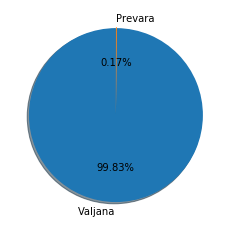

In [10]:
%matplotlib inline
labels = ['Valjana', 'Prevara']
sizes = [len(data[data['Class'] == 0]), len(data[data['Class'] == 1])]
explode = (0, .01)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
 

plt.show()

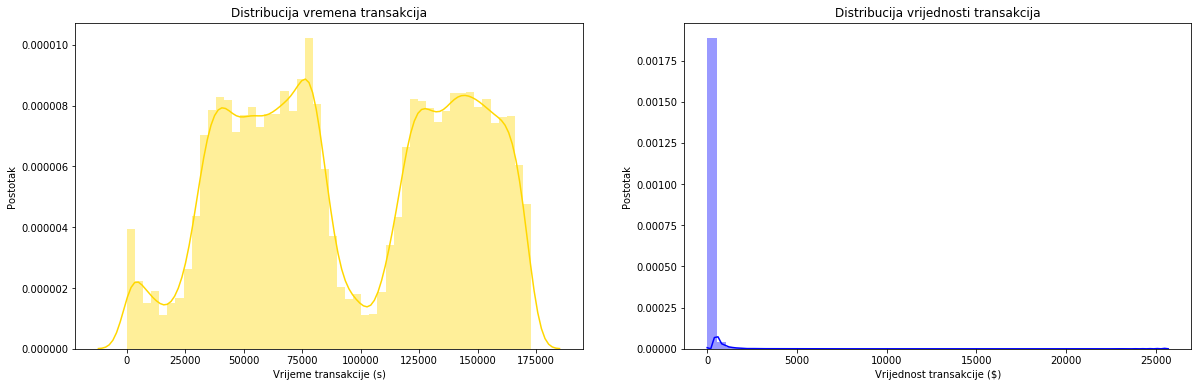

In [11]:
#distribucija vremena i vrijednosti
time_vals = data['Time'].values
amount_vals = data['Amount'].values


fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax2_labels = ['Postotak', 'Vrijeme transakcije (s)', 'Vrijednost transakcije ($)']
ax2[0].set_title('Distribucija vremena transakcija')
ax2[0].set_xlabel(ax2_labels[1])
ax2[0].set_ylabel(ax2_labels[0])
ax2[1].set_title('Distribucija vrijednosti transakcija')
ax2[1].set_xlabel(ax2_labels[2])
ax2[1].set_ylabel(ax2_labels[0])
sns.distplot(time_vals, ax=ax2[0], color='gold')
sns.distplot(amount_vals, ax=ax2[1], color='blue')
plt.show()

Prvo smo odlučili grafovski prikazati atribute 'Time' i 'Amount' (jer su to jedini neanonimni atributi). Na lijevom grafu (koji prikazuje kada su se transakcije događale) možemo primjetiti da ima sličan izgled kao grbe na devinim leđima. Razlog tome je što prikazujemo transakcije koje su se događale u periodu od 2 dana pa je vrlo vjerojatno da parabola između dviju grba predstavlja razdoblje noći (tada je puno manje transakcija). Desni graf prikazuje kolike su vrijednosti transakcija (primjerice koliko je novca nekom isplaćeno na bankomatu). Vidimo da je ta vrijednost najgušća na dijelu između 0 i 1000. To je logično jer se ne događa prečesto da ljudi trebaju veću količinu novca za svakodnevicu. Analizirajmo podatke s ta dva grafa malo detaljnije.

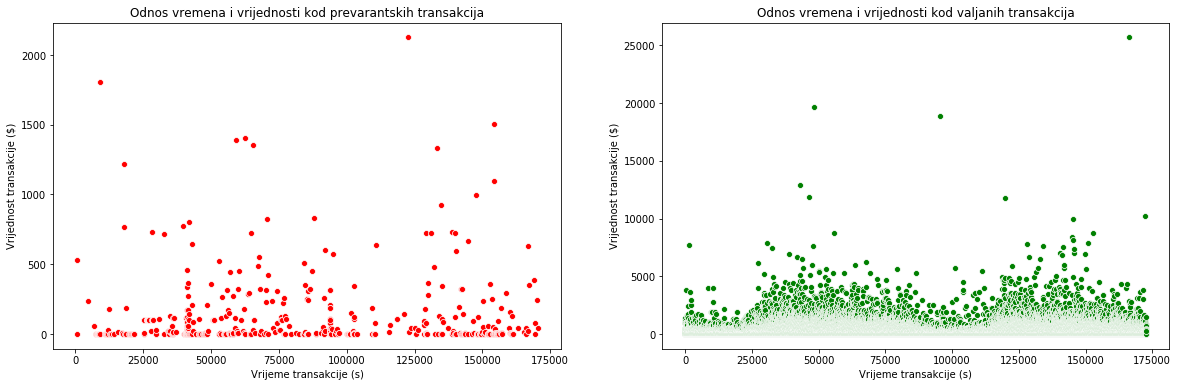

In [12]:
time_fraud = data[data['Class'] == 1]['Time'].values
time_non_fraud = data[data['Class'] == 0]['Time'].values

amount_fraud = data[data['Class'] == 1]['Amount'].values
amount_non_fraud = data[data['Class'] == 0]['Amount'].values

fig3, ax3 = plt.subplots(1,2, figsize=(20,6))
ax3_labels = ['Vrijeme transakcije (s)', 'Vrijednost transakcije ($)']
ax3[0].set_title('Odnos vremena i vrijednosti kod prevarantskih transakcija')
ax3[0].set_xlabel(ax3_labels[0])
ax3[0].set_ylabel(ax3_labels[1])
ax3[1].set_title('Odnos vremena i vrijednosti kod valjanih transakcija')
ax3[1].set_xlabel(ax3_labels[0])
ax3[1].set_ylabel(ax3_labels[1])
sns.scatterplot(time_fraud, amount_fraud, ax=ax3[0], color='r')
sns.scatterplot(time_non_fraud, amount_non_fraud, ax=ax3[1], color='g')
plt.show()

Grafovi iznad prikazuju kakav je odnos između vremena kada su se transakcije odvijale i vrijednosti tih transakcija pri čemu je lijevi graf za transakcije koje su prevare, dok desni graf prikazuje isti odnos samo za valjane transakcije. Iz tih grafova teško je išta zaključiti. Zato je najbolje da ukratko prikažemo brojkama kakve su veze među tim značajkama i klasom koja im je pridjeljena.

In [13]:
amount_mean = round(np.mean(amount_vals),2)
amount_fraud_mean = round(np.mean(amount_fraud),2)
amount_non_fraud_mean = round(np.mean(amount_non_fraud),2)
print('Prosječna vrijednost transakcija = ' + str(amount_mean) + '$' +
     '\nProsječna vrijednost transakcija koje su prevare = ' + str(amount_fraud_mean) + '$' +
     '\nProsječna vrijednost transakcija koje su valjane = ' + str(amount_non_fraud_mean) + '$')
print()
print('Makismalna vrijednost transakcije koja je prevara = ' + str(max(amount_fraud)) + '$'
      +'\nMakismalna vrijednost transakcije koja je valjana = ' + str(max(amount_non_fraud)) + '$')

print()
num_amount_fraud_less_than_mean = np.count_nonzero(amount_fraud < amount_fraud_mean)
num_amount_non_fraud_less_than_mean = np.count_nonzero(amount_non_fraud < amount_non_fraud_mean)
print('Udio prevarantskih transakcija manjih od njihove prosječne vrijednost = ' 
     + str(round(num_amount_fraud_less_than_mean / len(amount_fraud),2)) + '%'
     + '\nUdio valjanih transakcija manjih od njihove prosječne vrijednosti = '
     + str(round(num_amount_non_fraud_less_than_mean / len(amount_non_fraud),2)) + '%')

Prosječna vrijednost transakcija = 88.35$
Prosječna vrijednost transakcija koje su prevare = 122.21$
Prosječna vrijednost transakcija koje su valjane = 88.29$

Makismalna vrijednost transakcije koja je prevara = 2125.87$
Makismalna vrijednost transakcije koja je valjana = 25691.16$

Udio prevarantskih transakcija manjih od njihove prosječne vrijednost = 0.78%
Udio valjanih transakcija manjih od njihove prosječne vrijednosti = 0.77%


<p>Nakon ove detaljnije analize vidimo neke razlike među vrijednostima valjanih i prevarantskih transakcija. Prije svega prosječna vrijednost prevare je za 35 dolara veća od prosječne vrijednosti valjane transakcije, što je znantna razlika (prosječna vrijednost prevarantske transakcije je oko 1.4 puta veća od valjane). Također maksimalna vrijednost valjane transakcije je više nego 10 puta veća od maksimalne vrijednosti prevare. Doduše, to nije previše začuđujuće budući da je to ekstreman slučaj (moguće da je korisnik najveće valjane transakcije kupio novi auto ili remodelirao kuću). Ipak, 2125$ je dosta velika svota novca koja je nekom ukradena samo jednom transakcijom. Prikažimo sada pomoću boxplota razliku između vrijednosti transakcija koje su valjane i koje nisu.</p>

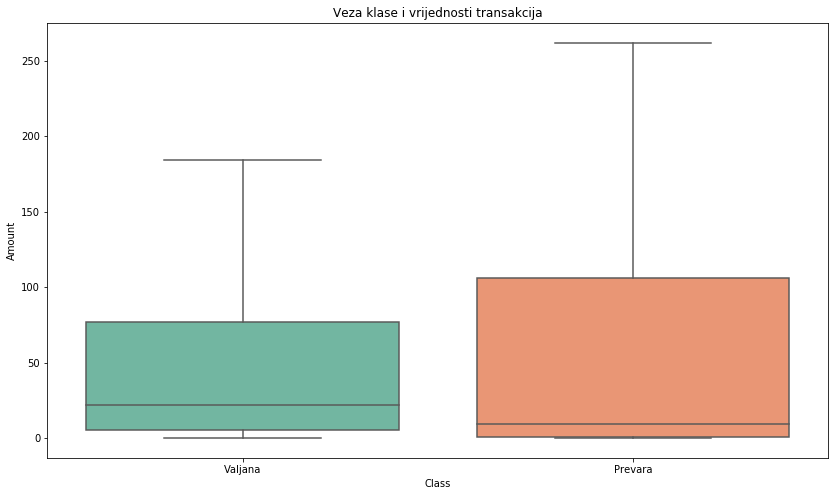

In [14]:
fig5, ax5 = plt.subplots(1,1,figsize=(14,8))
ax5.set_title('Veza klase i vrijednosti transakcija')
sns.boxplot(data['Class'], data['Amount'],
            showfliers=False, palette='Set2')
plt.xticks([0,1],['Valjana', 'Prevara'])
plt.show()

<b>Napomena</b>: Primjetimo da je <i>showfliers</i> postavljena na <i>False</i> kako na boxplotovima ne bi bilo ekstremnih outliera (tada bi cijeli dio između prvog i trećeg kvartila bila samo crta). <hr>Ovako vidimo ipak male razlike između kvartila valjanih i prevarantskih transakcija. <br>Sada ćemo napraviti analizu vremenske značajke. Kako bismo lakše razumjeli vremensku komponentu prikazat ćemo podatke u satima.

In [15]:
time_hours = np.sort(np.ceil((time_vals // 3600) % 24))
time_fraud_hours = np.sort(np.ceil(time_fraud // 3600) % 24)
time_non_fraud_hours = np.sort(np.ceil(time_non_fraud // 3600) % 24)

time_m = np.mean(time_hours)
time_fm = np.mean(time_fraud_hours)
time_nfm = np.mean(time_non_fraud_hours)

time_mean = '{0:02.0f}:{1:02.0f}'.format(*divmod(time_m * 60, 60))
time_fraud_mean = '{0:02.0f}:{1:02.0f}'.format(*divmod(time_fm * 60, 60))
time_non_fraud_mean = '{0:02.0f}:{1:02.0f}'.format(*divmod(time_nfm * 60, 60))

print('Prosječno vrijeme kada su se izvršavale transakcije = ' + str(time_mean)  +
     '\nProsječno vrijeme kada su se izvršavale preverantske transakcije = ' + str(time_fraud_mean) +
     '\nProsječno vrijeme kada su se izvršavale valjane transakcije = ' + str(time_non_fraud_mean))

Prosječno vrijeme kada su se izvršavale transakcije = 14:03
Prosječno vrijeme kada su se izvršavale preverantske transakcije = 11:39
Prosječno vrijeme kada su se izvršavale valjane transakcije = 14:03


<b>Napomena</b>: Kod podataka prikazanih iznad pretpostavili smo da je vrijeme izvršavanja prve transakcije bilo u 00:00 prvog dana. <hr> Vidimo da su se prevarantske transakcije događale nešto ranije u danu, no moguće da je to slučajnost.

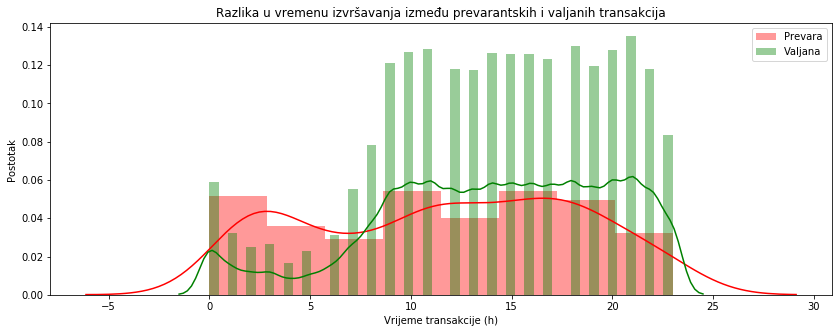

In [16]:
fig4, ax4 = plt.subplots(1,1, figsize=(14,5))
ax4_labels = ['Vrijeme transakcije (h)', 'Postotak']
ax4.set_title('Razlika u vremenu izvršavanja između prevarantskih i valjanih transakcija')
ax4.set_xlabel(ax4_labels[0])
ax4.set_ylabel(ax4_labels[1])
sns.distplot(time_fraud_hours, color='r')
sns.distplot(time_non_fraud_hours, color='g')
plt.legend(['Prevara', 'Valjana'])
plt.show()

Iz grafa vidimo da razlike u vremenu nisu previše različite kada usporedimo valjane i prevarantske transakcije. Također, intuitivno se vrijeme izvođenja transakcije ne čini kao značajka koja doprinosi klasifikaciji. Odnosno, prevaranti koji kradu s kartica neće čekat sredinu noći kako bi nekom ukrali novce. Pogledajmo još kakva je veza ostalih značajki i klase koja je pridjeljena transakcijama.

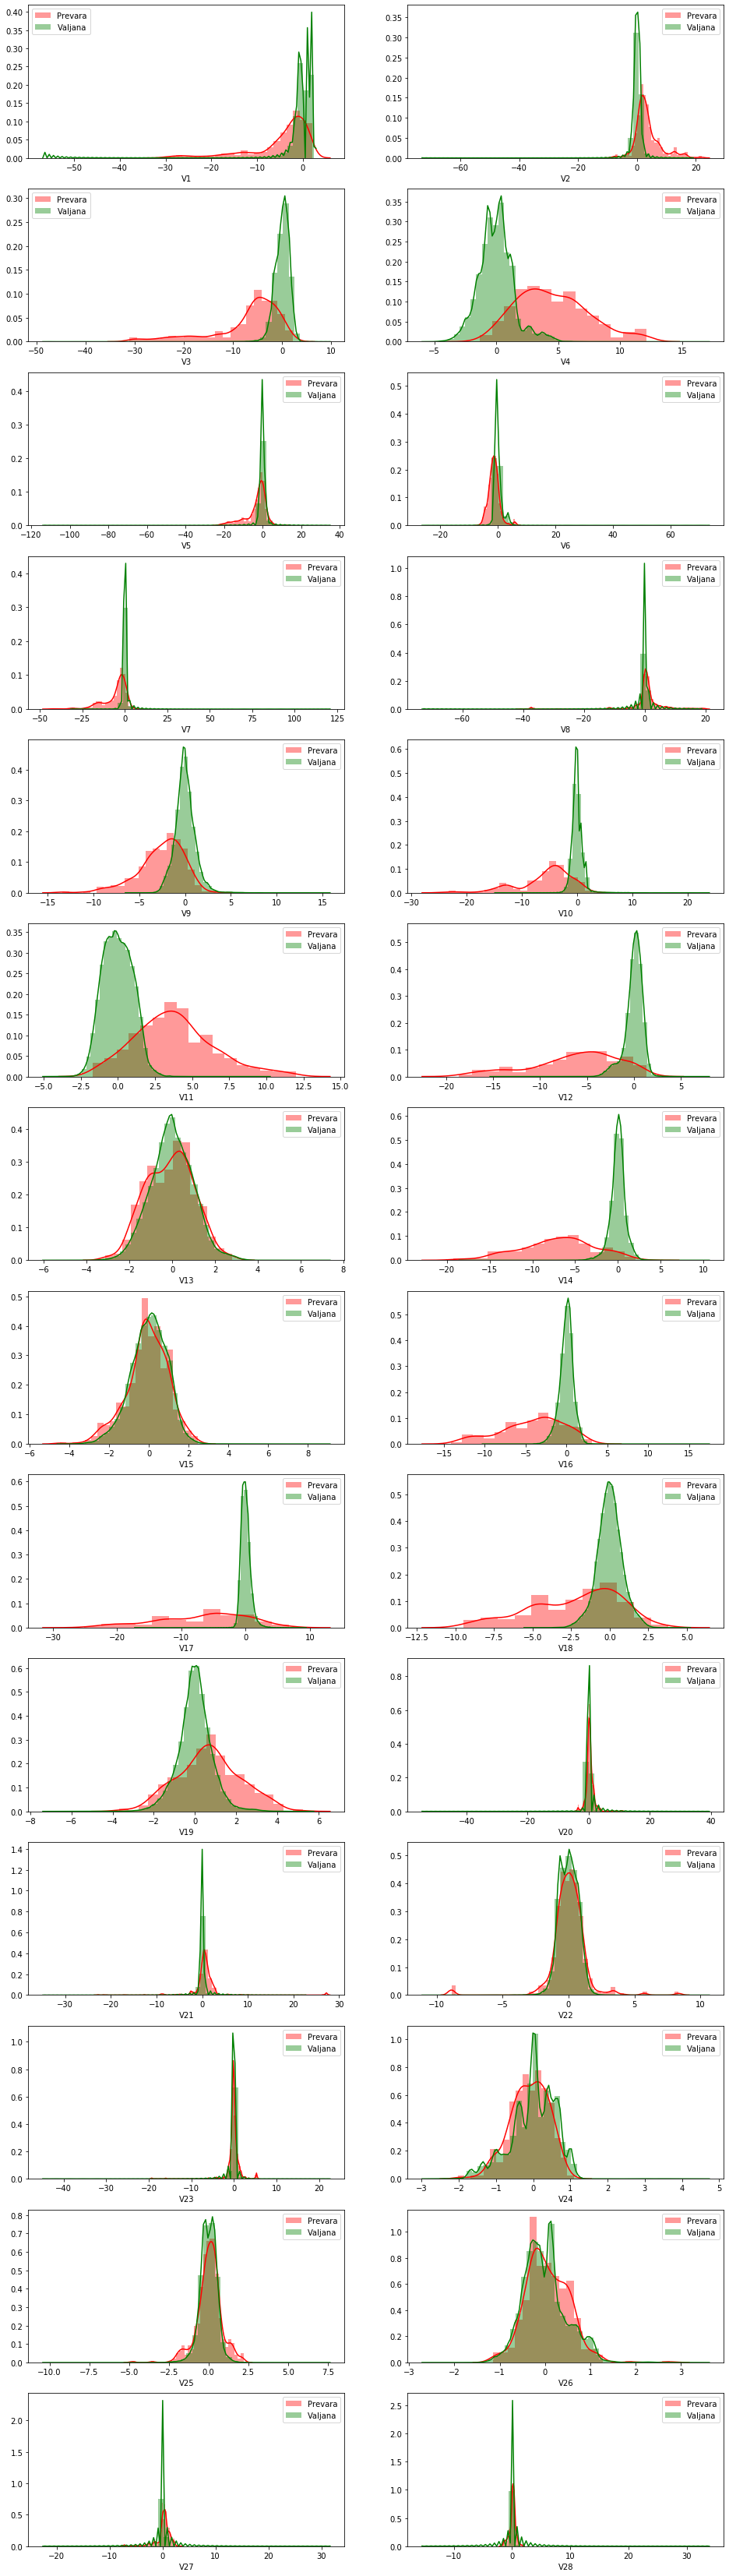

In [19]:
import matplotlib.gridspec as gridspec
v_features = data.iloc[:,1:29].columns
plt.figure(figsize=(16,60))

v_grid = gridspec.GridSpec(14, 2)

for i, feature in enumerate(data[v_features]):
    ax6 = plt.subplot(v_grid[i])
    sns.distplot(data[data['Class'] == 1][feature],  color='red') 
    sns.distplot(data[data['Class'] == 0][feature],  color='green')
    plt.legend(['Prevara', 'Valjana'])
plt.show()

Primjetimo da se grafovi valjanih i prevarantskih transakcija najviše razlikuju kod značajki: V3, V4, V9, V10, V11, V12, V14, V19. To znači da će vrijednosti tih značajki najviše pridononsiti klasifikaciji novih transakcija (jer su one najuže vezane za to je li neka transakcija prevara ili nije). Prikažimo je međusobnu koreliranost raznih značajki. Za to je najbolje koristiti korelacijsku matricu.

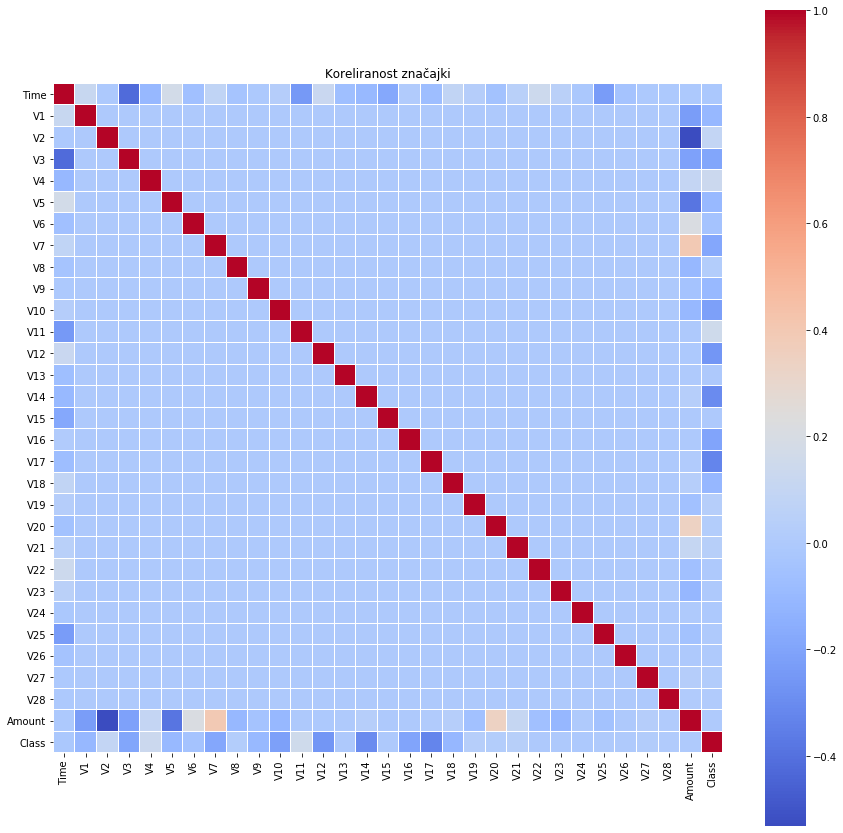

In [20]:
fig7,ax7 = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(data.corr(),linewidths=0.05,vmax=1.0, 
            square=True, cmap = plt.cm.coolwarm, linecolor='white', annot=False)
ax7.set_title('Koreliranost značajki')
plt.show()

Prikažimo sada i korelacijske matrice za prevare, odnosno valjane transakcije zasebno.

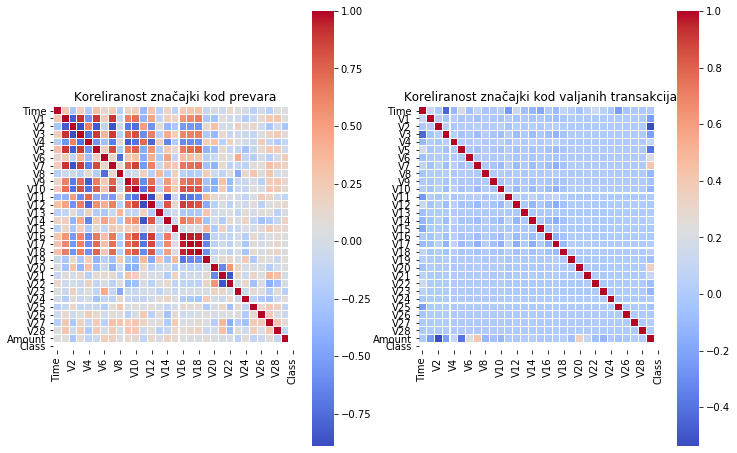

In [22]:
fig8,ax8 = plt.subplots(1,2,figsize=(12,8))
ax8[0].set_title('Koreliranost značajki kod prevara')
ax8[1].set_title('Koreliranost značajki kod valjanih transakcija')
sns.heatmap(data[data['Class'] == 1].corr(), ax=ax8[0], linewidths=0.05,vmax=1.0, 
            square=True, cmap = plt.cm.coolwarm, linecolor='white')
sns.heatmap(data[data['Class'] == 0].corr(), ax=ax8[1], linewidths=0.05,vmax=1.0, 
            square=True, cmap = plt.cm.coolwarm, linecolor='white')
plt.show()

Iz prethodne 3 korelacijske matrice možemo obratiti najviše pozornosti na onu koja prikazuje međusobnu koreliranost značajki kod prevara. Vidimo da kod takvih postoji dosta velika koreliranost (posebno kod anonimiziranih značajki) nekih varijabli koja je nevidljiva na ostale dvije matrice.

In [ ]:
## mozda jos